In [1]:
    import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Шлях до файлу CSV
file_path = r"C:\Users\a0494\Desktop\Nasa_hac\fires_with_speed_share.csv"

# Завантаження датасету
df = pd.read_csv(file_path)

# Виведення назв стовпців
print("Назви стовпців:")
print(df.columns)
# Виведення розміру датасету (кількість рядків та стовпців)
print("\nРозмір датасету:")
print(df.shape)


Назви стовпців:
Index(['X', 'Y', 'elevation', 'acq_time', 'frp', 'acq_date', 'confidence',
       'latitude', 'scan', 'instrument', 'time_sprea', 'type', 'slope',
       'version', 'brightness', 'group_id', 'bright_t31', 'daynight', 'id',
       'satellite', 'track', 'Map', 'longitude', 'nearest',
       'distance_to_nearest'],
      dtype='object')

Розмір датасету:
(20537, 25)


Accuracy: 0.7312560856864654
              precision    recall  f1-score   support

           0       0.75      0.96      0.84      2855
           1       0.10      0.01      0.02        85
           2       0.64      0.04      0.08       172
           3       0.71      0.03      0.06       161
           4       0.61      0.31      0.41       835

    accuracy                           0.73      4108
   macro avg       0.56      0.27      0.28      4108
weighted avg       0.70      0.73      0.67      4108

       Actual  Predicted
2323        0          0
18111       0          0
10259       2          0
15942       0          0
13889       0          0


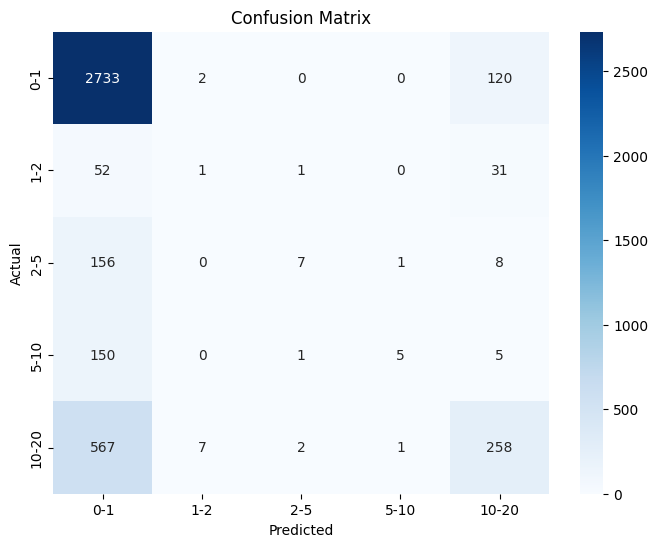

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier  # Замінено на класифікатор
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import math
# Шлях до нового файлу CSV
file_path = r"C:\Users\a0494\Desktop\Nasa_hac\fires_with_speed_share.csv"

# Завантаження датасету
df = pd.read_csv(file_path)

# Вибір потрібних ознак і цільової змінної
features = ['elevation', 'acq_time', 'frp', 'confidence', 'slope', 'brightness', 'bright_t31', 'Map']
target = 'distance_to_nearest'

# Виділення підмножини даних
data = df[features + [target]].copy()

# Розділення на тренувальний та тестовий набір
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Вибірки ознак та цільової змінної
X_train = train_data[features]
y_train = train_data[target].fillna(0)  # Заповнюємо NaN значення в цільовій змінній нулями

X_test = test_data[features]
y_test = test_data[target].fillna(0)  # Заповнюємо NaN значення в цільовій змінній нулями

def classify_distance(value):
    if value <= 1:
        return 0
    elif 1 < value <= 2:
        return 1
    elif 2 < value <= 5:
        return 2
    elif 5 < value <= 10:
        return 3
    else:
        return 4

y_train_class = y_train.apply(classify_distance)
y_test_class = y_test.apply(classify_distance)

# Обробка null значень
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_imputed, y_train_class)

# Передбачення класів
predictions_class = rf_model.predict(X_test_imputed)

# Оцінка моделі класифікації
accuracy = accuracy_score(y_test_class, predictions_class)
print(f'Accuracy: {accuracy}')

# Додаткова інформація про класифікацію
print(classification_report(y_test_class, predictions_class))

# ...

# Виведення результатів
results = pd.DataFrame({'Actual': y_test_class, 'Predicted': predictions_class})
print(results.head())

# Матриця помилок
conf_matrix = confusion_matrix(y_test_class, predictions_class)

# Візуалізація матриці помилок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0-1', '1-2', '2-5', '5-10', '10-20'],
            yticklabels=['0-1', '1-2', '2-5', '5-10', '10-20'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.2801850048685492
              precision    recall  f1-score   support

           0       0.86      0.26      0.39      3237
           1       0.09      0.46      0.15       153
           2       0.09      0.31      0.14       172
           3       0.07      0.36      0.12       161
           4       0.15      0.37      0.21       385

    accuracy                           0.28      4108
   macro avg       0.25      0.35      0.20      4108
weighted avg       0.70      0.28      0.35      4108

       Actual  Predicted
2323        0          2
18111       0          4
10259       2          2
15942       0          4
13889       0          4


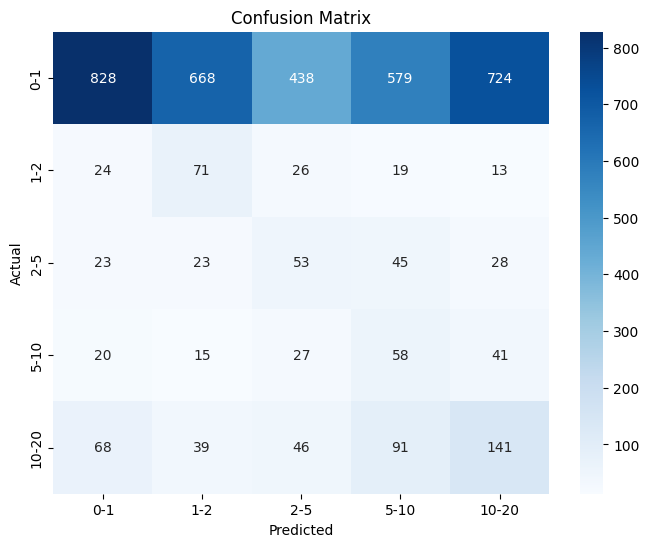

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r"C:\Users\a0494\Desktop\Nasa_hac\fires_with_speed_share.csv"

# Завантаження датасету
df = pd.read_csv(file_path)

# Вибір потрібних ознак і цільової змінної
features = ['elevation', 'acq_time', 'frp', 'confidence', 'slope', 'brightness', 'bright_t31', 'Map']
target = 'distance_to_nearest'

# Виділення підмножини даних
data = df[features + [target]].copy()

# Розділення на тренувальний та тестовий набір
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Вибірки ознак та цільової змінної
X_train = train_data[features]
y_train = train_data[target].fillna(0)  # Заповнюємо NaN значення в цільовій змінній нулями

X_test = test_data[features]
y_test = test_data[target].fillna(0)  # Заповнюємо NaN значення в цільовій змінній нулями

def classify_distance(value):
    if value <= 1:
        return 0
    elif 1 < value <= 2:
        return 1
    elif 2 < value <= 5:
        return 2
    elif 5 < value <= 10:
        return 3
    else:
        return 4

y_train_class = y_train.apply(classify_distance)
y_test_class = y_test.apply(classify_distance)

# Обробка null значень
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Балансування класів за допомогою RandomUnderSampler
rusNiPeaceDa = RandomUnderSampler(random_state=42)
X_train_imputed, y_train_class = rusNiPeaceDa.fit_resample(X_train_imputed, y_train_class)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_imputed, y_train_class)

# Передбачення класів
predictions_class = rf_model.predict(X_test_imputed)

# Оцінка моделі класифікації
accuracy = accuracy_score(y_test_class, predictions_class)
print(f'Accuracy: {accuracy}')

# Додаткова інформація про класифікацію
print(classification_report(y_test_class, predictions_class))

# ...

# Виведення результатів
results = pd.DataFrame({'Actual': y_test_class, 'Predicted': predictions_class})
print(results.head())

# Матриця помилок
conf_matrix = confusion_matrix(y_test_class, predictions_class)

# Візуалізація матриці помилок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0-1', '1-2', '2-5', '5-10', '10-20'],
            yticklabels=['0-1', '1-2', '2-5', '5-10', '10-20'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

2870
Epoch 1/35
72/72 [==============================] - 1s 4ms/step - loss: 17.2472 - accuracy: 0.2274 - val_loss: 60.4667 - val_accuracy: 0.0000e+00
Epoch 2/35
72/72 [==============================] - 0s 2ms/step - loss: 4.6142 - accuracy: 0.2718 - val_loss: 65.4865 - val_accuracy: 0.0000e+00
Epoch 3/35
72/72 [==============================] - 0s 3ms/step - loss: 3.4929 - accuracy: 0.2857 - val_loss: 71.5510 - val_accuracy: 0.0000e+00
Epoch 4/35
72/72 [==============================] - 0s 3ms/step - loss: 3.0158 - accuracy: 0.3018 - val_loss: 68.1436 - val_accuracy: 0.0000e+00
Epoch 5/35
72/72 [==============================] - 0s 4ms/step - loss: 2.8638 - accuracy: 0.2740 - val_loss: 72.7161 - val_accuracy: 0.0000e+00
Epoch 6/35
72/72 [==============================] - 0s 2ms/step - loss: 3.3120 - accuracy: 0.2822 - val_loss: 72.8737 - val_accuracy: 0.0000e+00
Epoch 7/35
72/72 [==============================] - 0s 2ms/step - loss: 2.9148 - accuracy: 0.2905 - val_loss: 76.7536 - val_

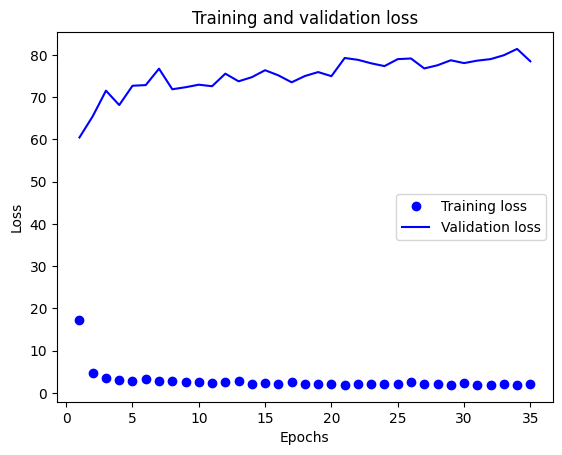

129/129 [==============================] - 0s 960us/step - loss: 8.1836 - accuracy: 0.5480
Test Loss: 8.183614730834961
Test Accuracy: 0.5479552149772644


In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r"C:\Users\a0494\Desktop\Nasa_hac\fires_with_speed_share.csv"

# Завантаження датасету
df = pd.read_csv(file_path)

# Вибір потрібних ознак і цільової змінної
features = ['elevation', 'acq_time', 'frp', 'confidence', 'slope', 'brightness', 'bright_t31', 'Map']
target = 'distance_to_nearest'

# Виділення підмножини даних
data = df[features + [target]].copy()

# Розділення на тренувальний та тестовий набір
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Вибірки ознак та цільової змінної
X_train = train_data[features]
y_train = train_data[target].fillna(0)  # Заповнюємо NaN значення в цільовій змінній нулями

X_test = test_data[features]
y_test = test_data[target].fillna(0)  # Заповнюємо NaN значення в цільовій змінній нулями

def classify_distance(value):
    if value <= 1:
        return 0
    elif 1 < value <= 2:
        return 1
    elif 2 < value <= 5:
        return 2
    elif 5 < value <= 10:
        return 3
    else:
        return 4

y_train_class = y_train.apply(classify_distance)
y_test_class = y_test.apply(classify_distance)

# Обробка null значень
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Балансування класів за допомогою RandomUnderSampler
rusNiPeaceDa = RandomUnderSampler(random_state=42)
X_train_imputed, y_train_class = rusNiPeaceDa.fit_resample(X_train_imputed, y_train_class)
X_train = X_train_imputed
y_train = y_train_class
X_test = X_test_imputed
y_test = y_test_class
print(y_train.shape[0])

# Створення та компіляція моделі
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Навчання моделі з валідацією
history = model.fit(X_train, y_train, epochs=35, validation_split=0.2)

# Візуалізація результатів
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Оцінка моделі на тестовому наборі
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

In [24]:
# Отримання прогнозів для тестового набору
y_pred = model.predict_classes(X_test)

# Розрахунок матриці плутанини
conf_matrix = confusion_matrix(y_test, y_pred)

# Візуалізація матриці плутанини з допомогою seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

AttributeError: 'Sequential' object has no attribute 'predict_classes'